In [ ]:
""" 
A major advantage of decision trees is that they can be computed automatically from databases by supervised learning algorithms. 
These algorithms automatically select discriminating variables from unstructured and potentially large data. 
They can thus extract logical rules of cause and effect (determinisms) that did not initially appear in the raw data.

Algorithms based on decision trees provide a simple and quick answer to a classification problem. 
They do not make assumptions about the data and are not affected by problems of variable scaling. 
They can handle both numerical and categorical variables, and are easily interpreted.

Decision tree models can, however, be quite unstable: they are sensitive to variations (even small ones) in the training set in terms of samples or variables considered. 
Sometimes, decision trees are also very complex, and generalize poorly the training set (overfitting). 
Additional pruning procedures are used to get around this problem, some approaches such as random forests allow to get rid of this problem.

Used in Data Mining. Classification Tree if discrete values, regression tree otherwise.
"""

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
bc_data = pd.read_csv('source/breast_cancer.csv')

bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
""" No variables contain missing values. All variables except 'diagnosis' are continuous variables, but the decision trees work equally well with discrete or qualitative variables (after dichotomization on scikit-learn). A look at the first lines of the DataFrame shows us that the different variables are not at the same scale, but very little preprocessing is needed when using a decision tree classification.

Classifier highly used in companies. Easy communication
two phases:"""

In [18]:
data = bc_data.iloc[:, 2:32]
target = bc_data.diagnosis


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 123)
dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 123)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames = ['actual'], colnames = ['predict'])

predict,B,M
actual,,
B,72,1
M,3,38


In [19]:
features = {}
for feature, importance in zip(data.columns, dt_clf.feature_importances_):
    if importance > 0:
        features[feature] = importance

importances = pd.DataFrame.from_dict(features, orient = 'index').rename(columns = {0: 'Importance'})
importances.sort_values(by = 'Importance')

,Importance
compactness_se,0.011072
area_worst,0.016107
radius_se,0.020865
texture_worst,0.041369
texture_mean,0.051408
concavity_mean,0.060736
concave points_worst,0.177674
radius_worst,0.620770


In [21]:
# Impurity measures ?
dt_clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=321)
dt_clf_gini.fit(X_train, y_train)
y_pred_gini = dt_clf_gini.predict(X_test)
pd.crosstab(y_test, y_pred_gini, rownames=['actual'], colnames=['pred'])

pred,B,M
actual,,
B,72,1
M,4,37


In [23]:
features = {}
for feature, importance in zip(data.columns, dt_clf_gini.feature_importances_):
    if importance > 0:
        features[feature] = importance

importances = pd.DataFrame.from_dict(features, orient = 'index').rename(columns = {0: 'Importance'})
importances.sort_values(by = 'Importance')

,Importance
compactness_se,0.008669
fractal_dimension_worst,0.009496
texture_se,0.009682
smoothness_mean,0.011231
area_worst,0.016458
texture_mean,0.030343
concavity_mean,0.033920
texture_worst,0.048798
concave points_worst,0.112821
radius_worst,0.718582


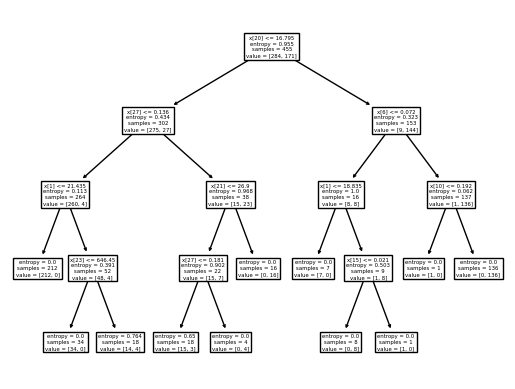

In [28]:
from sklearn import tree
tree.plot_tree(dt_clf);

In [ ]:
""" Additional Information
Pruning should reduce the size of a learning tree without reducing predictive accuracy as measured by a cross-validation set.
PrePruning: Cut before the tree grows, i.e., max tree depth. 
PostPruning: Replace nodes and subtrees with leaves
    - Reduce Error Pruning: Work our way up. For each node replace by leave if the prediction value does not change.
    Impure node with 5 : 4 -> Replace to leave with target of the 5. 
"""